In [ ]:
%matplotlib inline

In [ ]:
# installing mplsoccer
# !pip install mplsoccer

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

### Opening dataset

In [ ]:
# instantiating the parser Sbopen available mplsoccer
parser = Sbopen()

# stracting the DataFrame of England vs. Sweden Women World Cup using method event
df, related, freeze, tactics = parser.event(69301)

# get team names
team1, team2 = df.team_name.unique()

# dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

### Making the shot map using iterative solution

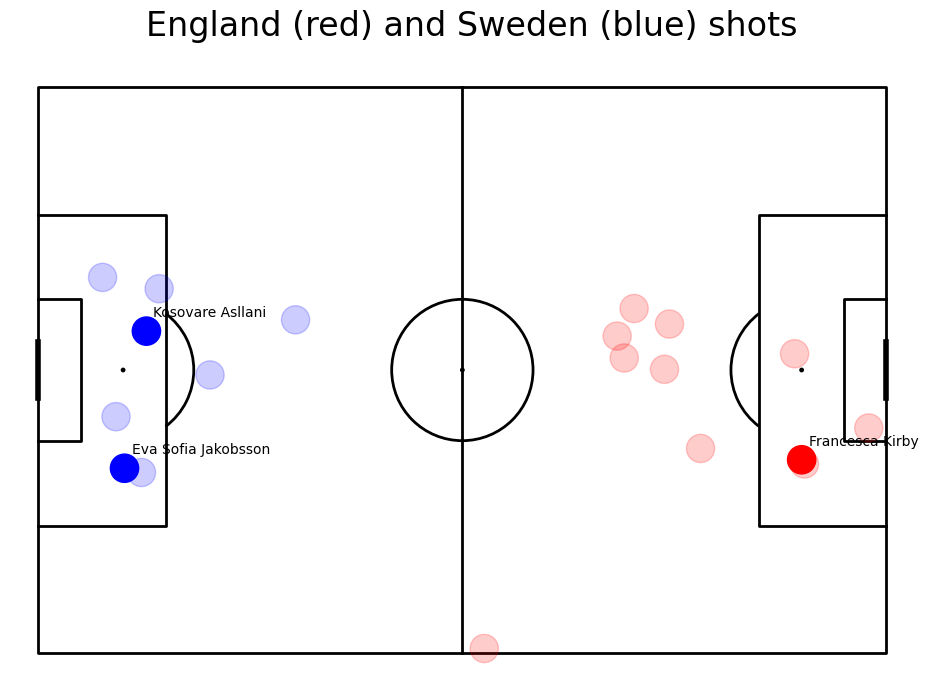

In [ ]:
# Drawing pitch using Pitch class available in mplsoccer
pitch = Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize=(10, 7))

# size of the pitch in yards
pitchLengthX = 120
pitchWidthY = 80

# Plot shots bu looping
for i, shot in shots.iterrows():

    # get info
    x = shot['x']
    y = shot['y']

    goal = shot['outcome_name'] == 'Goal'
    team_name = shot['team_name']

    # set circle size
    circle_size=2

    # plot England
    if (team_name == team1):

        if goal:
            shotCircle = plt.Circle((x,y), circle_size, color='red')
            plt.text(x+1, y-2, shot['player_name'])

        else:
            shotCircle = plt.Circle((x, y), circle_size, color='red')
            shotCircle.set_alpha(.2)

    else:

        if goal:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY - y), circle_size, color='blue')
            plt.text(pitchLengthX - x + 1, pitchWidthY - y - 2, shot['player_name'])

        else:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY - y), circle_size, color='blue')
            shotCircle.set_alpha(.2)

    ax.add_patch(shotCircle)

# set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()
